Welcome to Moving Average Calculator
-----------------------------------
Select data source:
1. Yahoo Finance
2. Load from CSV
3. Manual entry
Enter your choice (1/2/3): 2
Enter the path to the stock dataset (CSV file): C:/Users/HP PC/Downloads/FBNH Historical Data.csv
Data fetched successfully from CSV.
Enter the window size for moving averages calculation: 252

Simple Moving Averages:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Close, dtype: float64

Exponential Moving Averages:
0    23.550000
1    23.550000
2    23.551581
3    23.555126
4    23.558643
Name: Close, dtype: float64


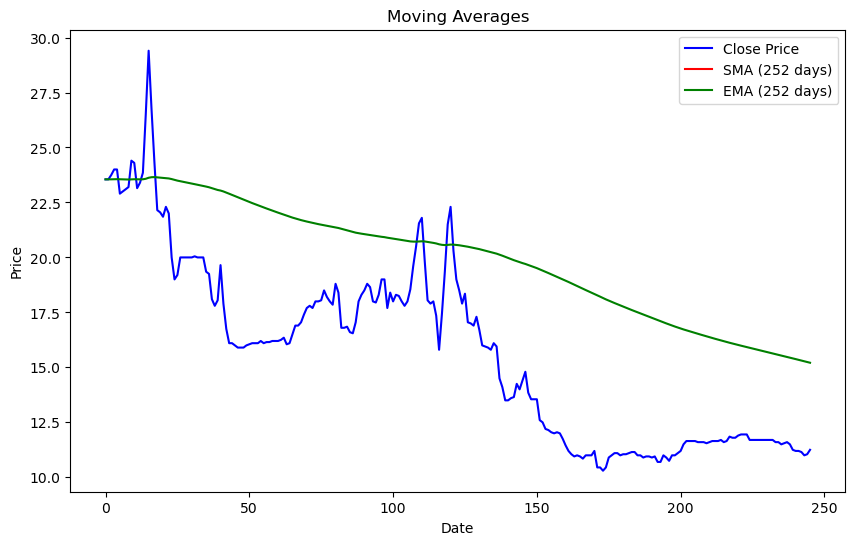

Based on the latest price, the trend is bearish.
Consider selling or staying away from the stock.


In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


def advise(stock_data, window):
    if stock_data['Close'].iloc[-1] > stock_data['Close'].iloc[-window:].mean():
        print("Based on the latest price, the trend is bullish.")
        print("Consider buying or holding the stock.")
    elif stock_data['Close'].iloc[-1] < stock_data['Close'].iloc[-window:].mean():
        print("Based on the latest price, the trend is bearish.")
        print("Consider selling or staying away from the stock.")
    else:
        print("Based on the latest price, there's no clear indication of trend.")


def get_yahoo_price_data(symbol, start_date, end_date):
    try:
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        print("Data fetched successfully from Yahoo Finance.")
        return stock_data
    except Exception as e:
        print("Error fetching data from Yahoo Finance:", e)
        return None

def get_csv_price_data(file_path):
    try:
        stock_data = pd.read_csv(file_path)
        print("Data fetched successfully from CSV.")
        return stock_data
    except FileNotFoundError:
        print("File not found.")
        return None
    except Exception as e:
        print("Error reading CSV file:", e)
        return None

def get_manual_price_data():
    prices = []

    print("Enter historical price data (type 'done' to finish):")
    while True:
        price = input("Price: ")
        if price.lower() == 'done':
            break
        try:
            prices.append(float(price))
        except ValueError:
            print("Invalid price. Please enter a valid number.")

    return prices

def main():
    print("Welcome to Moving Average Calculator")
    print("-----------------------------------")
    print("Select data source:")
    print("1. Yahoo Finance")
    print("2. Load from CSV")
    print("3. Manual entry")

    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        symbol = input("Enter the stock symbol (e.g., AAPL): ")
        start_date = input("Enter the start date (YYYY-MM-DD): ")
        end_date = input("Enter the end date (YYYY-MM-DD): ")

        stock_data = get_yahoo_price_data(symbol, start_date, end_date)
    elif choice == '2':
        file_path = input("Enter the path to the stock dataset (CSV file): ")
        stock_data = get_csv_price_data(file_path)
    elif choice == '3':
        prices = get_manual_price_data()
        data = {'Close': prices}
        stock_data = pd.DataFrame(data)
    else:
        print("Invalid choice.")
        return

    if stock_data is None or stock_data.empty:
        print("No data available.")
        return

    window = int(input("Enter the window size for moving averages calculation: "))

    sma = stock_data['Close'].rolling(window=window).mean()
    ema = stock_data['Close'].ewm(span=window, adjust=False).mean()

    print("\nSimple Moving Averages:")
    print(sma.head())

    print("\nExponential Moving Averages:")
    print(ema.head())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, sma, label=f'SMA ({window} days)', color='red')
    plt.plot(stock_data.index, ema, label=f'EMA ({window} days)', color='green')
    plt.title('Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    advise(stock_data, window)

    


if __name__ == "__main__":
    main()
